In [39]:
#Import 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint


In [40]:
#Read CSV
path = 'Data/vgsales.csv'
video_games_df = pd.read_csv(path)
video_games_df = video_games_df.rename(columns = {"Publisher": "Publisher",
                                                 "NA_Sales": "North American Sales",
                                                 "EU_Sales": "European Sales",
                                                 "JP_Sales": "Japan Sales",
                                                 "Other_Sales": "Other Sales",
                                                 "Global_Sales": "Global Sales"})
video_games_df = video_games_df.set_index("Rank")
video_games_df.head()

,Name,Platform,Year,Genre,Publisher,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


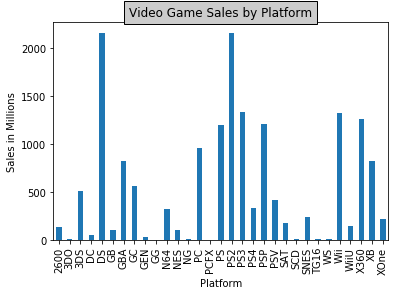

<Figure size 432x288 with 0 Axes>

In [41]:
platform_df = video_games_df.groupby('Platform')
sales = platform_df["Global Sales"].count()

video_games_bar = sales.plot(kind="bar")
video_games_bar.set_title("Video Game Sales by Platform", bbox ={'facecolor':'0.8', 'pad':5})
video_games_bar.set_xlabel("Platform")
video_games_bar.set_ylabel("Sales in Millions")

plt.show()
plt.tight_layout()

In [42]:
#nintendo = video_games_df.loc(['Platform'] = 'Nintendo')
#sorted_platforms_df = platform_df.iloc(["Global Sales"] > 10)
#sorted_platforms_df.head()
ds_data = video_games_df.loc[video_games_df['Platform'] == 'DS', :]
ds_data.head()

,Name,Platform,Year,Genre,Publisher,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


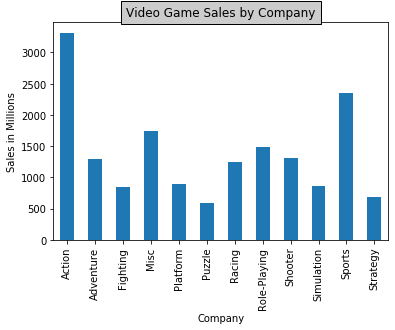

<Figure size 432x288 with 0 Axes>

In [43]:
genre_df = video_games_df.groupby('Genre')
sales_comp = genre_df["Global Sales"].count()

video_games_comp_bar = sales_comp.plot(kind="bar")
video_games_comp_bar.set_title("Video Game Sales by Company", bbox ={'facecolor':'0.8', 'pad':5})
video_games_comp_bar.set_xlabel("Company")
video_games_comp_bar.set_ylabel("Sales in Millions")

plt.show()
plt.tight_layout()

In [44]:
video_games_df.sort_values(by='Global Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01


In [45]:
video_games_df['Global Sales'].mean()

0.53744065550074

In [46]:
company_group_df = video_games_df.groupby(['Publisher'])
company_gsales_df = pd.DataFrame(company_group_df["Global Sales"].sum())
company_gsales_sorted_df = company_gsales_df.sort_values(by='Global Sales',ascending=False)

companies_df = company_gsales_sorted_df.loc[company_gsales_sorted_df["Global Sales"] > 250]
companies_df


#company_df = video_games_df.loc[video_games_df["Global Sales"] > 10, ["Company", "Global Sales"]]
#company_df


,Global Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


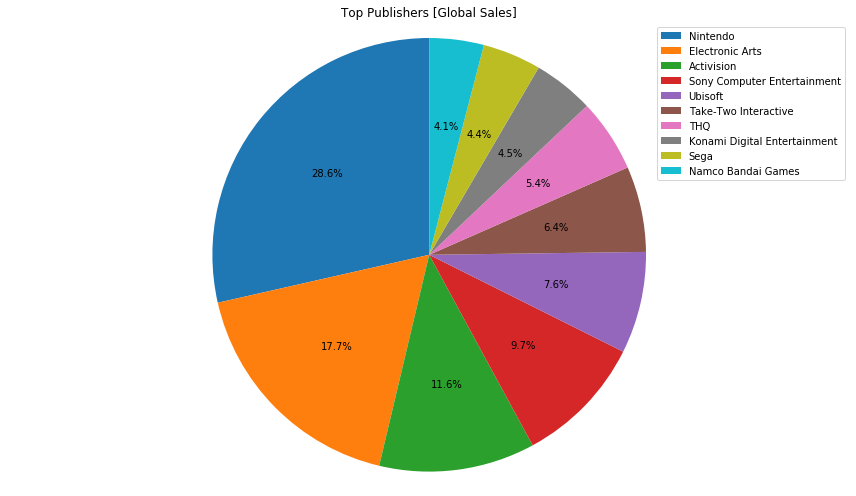

In [47]:
labels = companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(companies_df['Global Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Global Sales]')
plt.tight_layout()
plt.show()

In [48]:
company_group_df = video_games_df.groupby(['Publisher'])
company_na_df = pd.DataFrame(company_group_df["North American Sales"].sum())
company_na_sorted_df = company_na_df.sort_values(by='North American Sales',ascending=False)

na_companies_df = company_na_sorted_df.loc[company_na_sorted_df["North American Sales"] > 100]
na_companies_df

,North American Sales
Publisher,
Nintendo,816.87
Electronic Arts,595.07
Activision,429.70
Sony Computer Entertainment,265.22
Ubisoft,253.43
Take-Two Interactive,220.49
THQ,208.77
Microsoft Game Studios,155.35
Atari,110.04


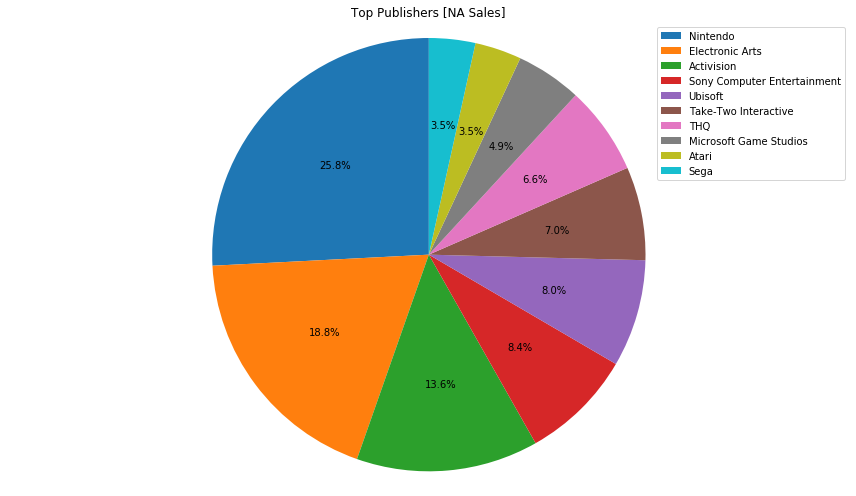

In [49]:
labels = na_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(na_companies_df['North American Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [NA Sales]')
plt.tight_layout()
plt.show()

In [50]:
company_group_df = video_games_df.groupby(['Publisher'])
company_euro_df = pd.DataFrame(company_group_df["European Sales"].sum())
company_euro_sorted_df = company_euro_df.sort_values(by='European Sales',ascending=False)

euro_companies_df = company_euro_sorted_df.loc[company_euro_sorted_df["European Sales"] > 60]
euro_companies_df

,European Sales
Publisher,
Nintendo,418.74
Electronic Arts,371.27
Activision,215.53
Sony Computer Entertainment,187.72
Ubisoft,163.32
Take-Two Interactive,118.14
THQ,94.73
Sega,82.00
Konami Digital Entertainment,69.69


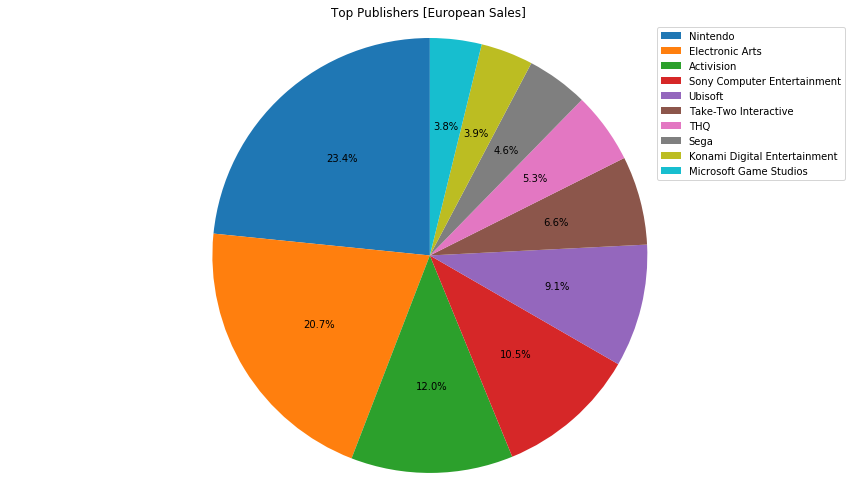

In [51]:
labels = euro_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(euro_companies_df['European Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [European Sales]')
plt.tight_layout()
plt.show()

In [52]:
video_games_df.head()

,Name,Platform,Year,Genre,Publisher,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [53]:
company_group_df = video_games_df.groupby(['Publisher'])
company_japan_df = pd.DataFrame(company_group_df["Japan Sales"].sum())
company_japan_sorted_df = company_japan_df.sort_values(by='Japan Sales',ascending=False)

japan_companies_df = company_japan_sorted_df.loc[company_japan_sorted_df["Japan Sales"] > 20]
japan_companies_df

,Japan Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
Sega,57.03
Square Enix,49.88
SquareSoft,40.13
Enix Corporation,32.40


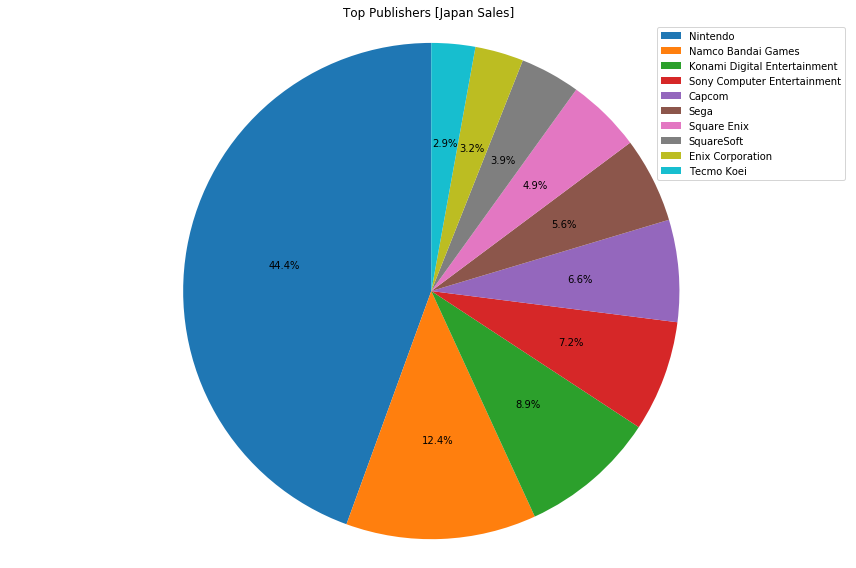

In [54]:
labels = japan_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.pie(japan_companies_df['Japan Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Japan Sales]')
plt.tight_layout()
plt.show()

In [61]:
company_group_df = video_games_df.groupby(['Publisher'])
company_other_df = pd.DataFrame(company_group_df["Other Sales"].sum())
company_other_sorted_df = company_other_df.sort_values(by='Other Sales',ascending=False)

other_companies_df = company_other_sorted_df.loc[company_other_sorted_df["Other Sales"] > 20]
other_companies_df

,Other Sales
Publisher,
Electronic Arts,129.77
Nintendo,95.33
Sony Computer Entertainment,80.45
Activision,75.34
Take-Two Interactive,55.24
Ubisoft,50.26
THQ,32.14
Konami Digital Entertainment,30.31
Sega,24.52


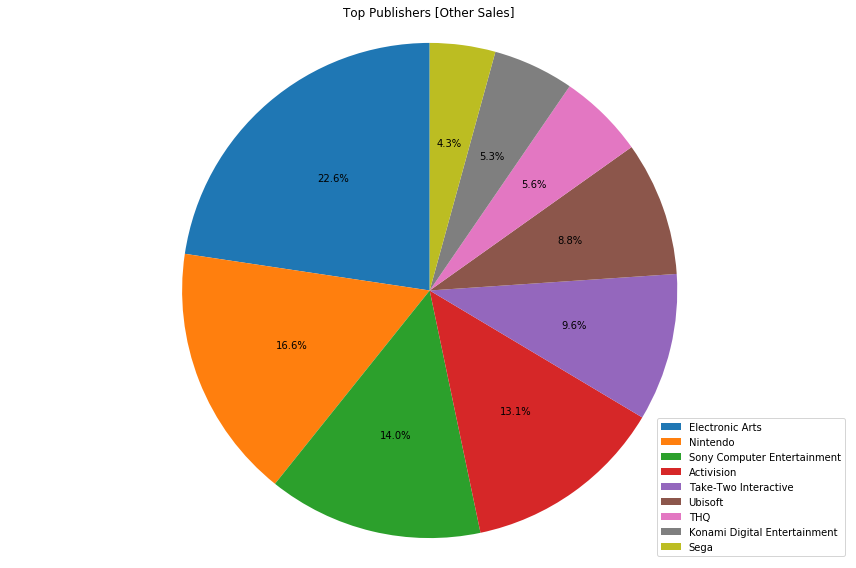

In [62]:
labels = other_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.pie(other_companies_df['Other Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Other Sales]')
plt.tight_layout()
plt.show()